In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/kathanbhavsar/Desktop/Python,DS,ML/DATA/airline_tweets.csv')

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

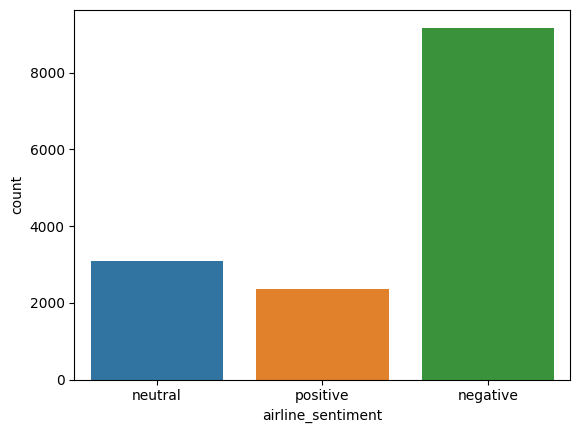

In [5]:
 sns.countplot(df,x='airline_sentiment')

<AxesSubplot:xlabel='negativereason', ylabel='count'>

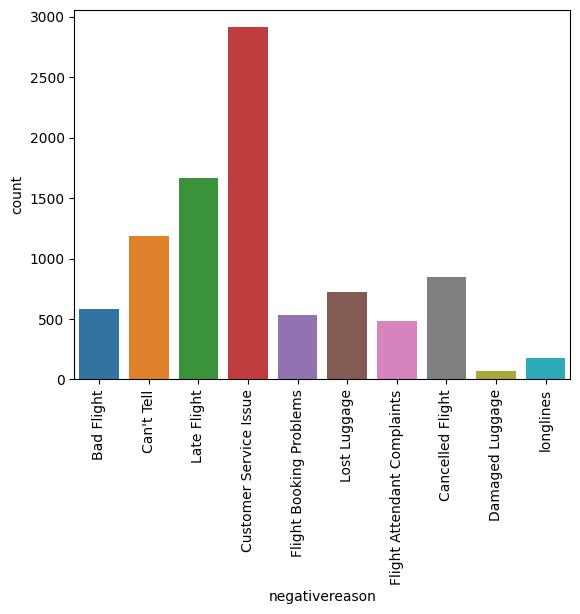

In [7]:
plt.xticks(rotation=90)
sns.countplot(df,x='negativereason')

<AxesSubplot:xlabel='airline', ylabel='count'>

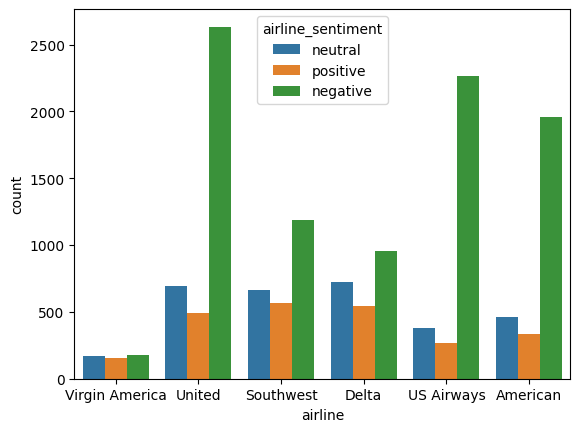

In [9]:
sns.countplot(df,x='airline',hue='airline_sentiment')

In [10]:
data = df[['airline_sentiment','text']]

In [12]:
X = df['text']
y = df['airline_sentiment']

In [13]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
tfidf = TfidfVectorizer(stop_words='english')

In [29]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [31]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [33]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

In [34]:
from sklearn.svm import SVC,LinearSVC

In [35]:
rbf_svc = SVC()

In [36]:
rbf_svc.fit(X_train_tfidf,y_train)

SVC()

In [38]:
linear = LinearSVC()
linear.fit(X_train_tfidf,y_train)

LinearSVC()

In [39]:
from sklearn.metrics import classification_report,plot_confusion_matrix

In [40]:
def report(model):
    pred = model.predict(X_test_tfidf)
    print(classification_report(y_test,pred))
    plot_confusion_matrix(model,X_test_tfidf,y_test)
    

              precision    recall  f1-score   support

    negative       0.69      0.99      0.81      1889
     neutral       0.75      0.15      0.25       580
    positive       0.94      0.18      0.31       459

    accuracy                           0.70      2928
   macro avg       0.79      0.44      0.46      2928
weighted avg       0.74      0.70      0.62      2928



/Users/kathanbhavsar/Desktop/anaconda3/envs/kathan/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


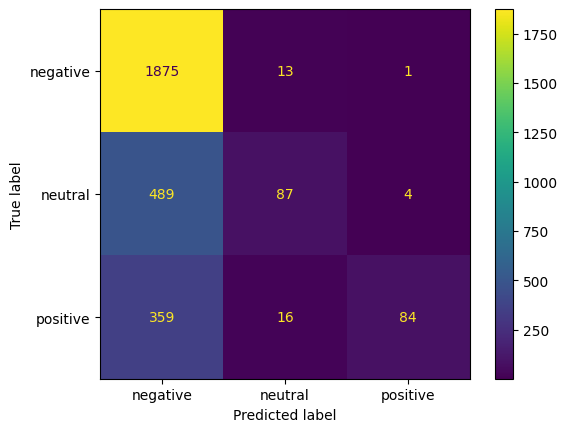

In [41]:
report(nb)

              precision    recall  f1-score   support

    negative       0.81      0.95      0.87      1889
     neutral       0.68      0.42      0.52       580
    positive       0.80      0.61      0.69       459

    accuracy                           0.79      2928
   macro avg       0.76      0.66      0.69      2928
weighted avg       0.78      0.79      0.77      2928



/Users/kathanbhavsar/Desktop/anaconda3/envs/kathan/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


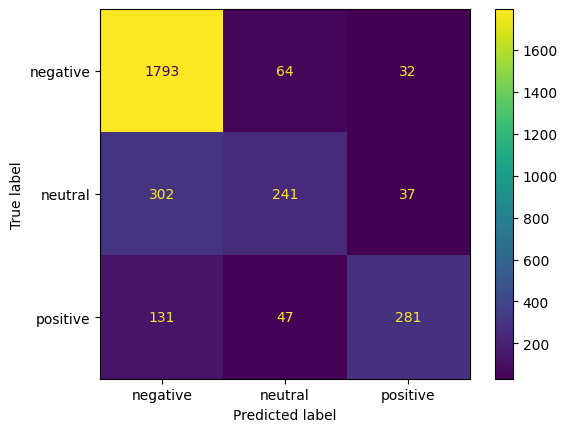

In [42]:
report(rbf_svc)

              precision    recall  f1-score   support

    negative       0.85      0.91      0.88      1889
     neutral       0.64      0.54      0.58       580
    positive       0.76      0.67      0.71       459

    accuracy                           0.80      2928
   macro avg       0.75      0.71      0.72      2928
weighted avg       0.79      0.80      0.79      2928



/Users/kathanbhavsar/Desktop/anaconda3/envs/kathan/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


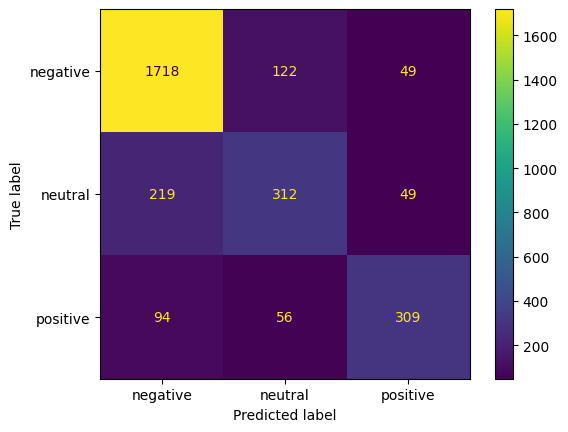

In [43]:
report(linear)

In [44]:
from sklearn.pipeline import Pipeline

In [45]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])

In [46]:
pipe.fit(X,y)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [48]:
pipe.predict(['Absolute Dog shit'])

array(['negative'], dtype=object)

In [52]:
pipe.predict(['Crazy flight'])

array(['negative'], dtype=object)